<a href="https://colab.research.google.com/github/DorotaJanosz/neural-network-course/blob/master/02_keras/05_save_load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import bibliotek

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

sns.set()

## Załadowanie i oksploracja danych

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

(-0.5, 27.5, 27.5, -0.5)

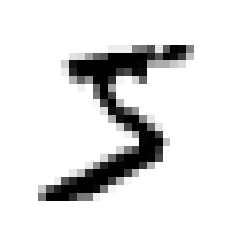

In [5]:
plt.imshow(train_images[0], cmap='gray_r')
plt.grid(False)
plt.axis(False)

In [6]:
train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

## Budowa modelu

In [7]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Zapisanie całego modelu

In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 1.0000
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 1.0000
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 0.9990
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 1.0000


In [12]:
model.save('my_model.h5')

In [17]:
from tensorflow.keras.models import load_model

new_model = load_model('my_model.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print(acc)

32/32 - 0s - loss: 0.4184 - accuracy: 0.8670
0.8669999837875366
